In [1]:
import os
import numpy as np
import numpy as np
# import torch
# from arsf_envi_reader import envi_header
import shutil
import os
import json
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from osgeo import gdal,ogr,osr
from scipy.optimize import curve_fit
# from tqdm import tqdm
# import multiprocess as mp
from scipy import ndimage
from numpy import trapz

In [2]:
folder_path = r"E:\wenqu\numpy_file\npy_file\site2c"


In [3]:

data_dict = {}

for file_name in os.listdir(folder_path):
    if file_name.endswith(".npy"):
        variable_name = os.path.splitext(file_name)[0]  # Remove the file extension from the name
        variable_data = np.load(os.path.join(folder_path, file_name))
        data_dict[variable_name] = variable_data



In [4]:
data_dict

{'b100_mean': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'b100_std': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'b101_mean': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'b101_std': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0.

In [5]:
data_dict['b101_mean'].shape

(5470, 4744)

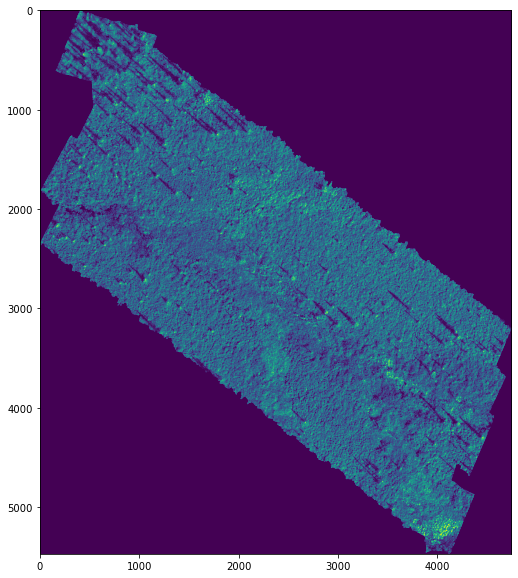

In [6]:
fig = plt.figure(figsize = (10,10))
plt.imshow(data_dict['b101_mean'] , interpolation='nearest')
plt.show()

# SLA

In [7]:
sla_trait = 0.237517*data_dict['b18_std'] + 0.668636*data_dict['b96_std'] + 0.403078*data_dict['b90_mean'] + -0.017015*data_dict['b117_std'] + 0.504321*data_dict['b13_std'] + 0.456332*data_dict['b46_std'] + 0.049884*data_dict['b14_std'] + -0.543519*data_dict['b102_std'] + 0.574625*data_dict['b117_mean'] + -0.629024*data_dict['b41_std'] + 0.239937*data_dict['b6_mean'] + 0.127806*data_dict['b5_std'] + 0.280690*data_dict['b29_std'] + -0.097590*data_dict['b1_mean'] + 0.519319*data_dict['b48_std'] + -0.098348*data_dict['b119_std'] + 0.751902*data_dict['b91_std'] + 0.562071*data_dict['b97_std'] + -0.242682*data_dict['b86_std'] + -0.014028*data_dict['b59_mean'] + 0.795791*data_dict['b16_std'] + -0.863502*data_dict['b121_mean'] + -0.148162*data_dict['b112_mean'] + 0.301753*data_dict['b52_std'] + 0.476519*data_dict['b108_std'] + 0.072741*data_dict['b60_mean'] + -0.594958*data_dict['b59_std'] + -0.249027*data_dict['b17_std'] + -0.083279*data_dict['b113_std'] + 0.335210*data_dict['b7_mean'] + 0.708515*data_dict['b116_std'] + 0.289122*data_dict['b9_std'] + -0.356794*data_dict['b7_std'] + -0.471419*data_dict['b98_std'] + -0.099426*data_dict['b8_std'] + -0.525773*data_dict['b8_mean'] + -0.906927*data_dict['b103_std'] + -0.695379*data_dict['b25_std'] + 0.224129*data_dict['b2_mean'] + -0.322794*data_dict['b3_mean'] + -0.741657*data_dict['b107_std'] + -0.869553*data_dict['b12_std'] + 4.506519

In [8]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')

pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_sla_trait_trait.tif"
outPath ='E:/wenqu/trait_map/trait_map_without_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(sla_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# PC

In [9]:
pc_trait = (0.089198*data_dict['b62_mean'] + 0.055223*data_dict['b57_mean'] + 0.052990*data_dict['b24_std'] 
            + -0.048250*data_dict['b47_mean'] + 0.021677*data_dict['b52_std'] + -0.042871*data_dict['b71_std'] 
            + -0.065187*data_dict['b117_mean'] + -0.059122*data_dict['b70_std'] + 0.050144*data_dict['b10_std'] 
            + 0.032457*data_dict['b24_mean'] + 0.050990*data_dict['b84_std'] + 0.009173*data_dict['b22_mean'] 
            + -0.012383*data_dict['b103_std'] + 0.031545*data_dict['b100_std']  
            + -0.087389*data_dict['b91_std'] + -0.052623*data_dict['b8_std'] +  
            + -0.036670*data_dict['b118_std'] + 0.002734*data_dict['b56_std'] + 0.004339*data_dict['b77_std'] 
            + 0.035791*data_dict['b34_std'] + -0.017977*data_dict['b2_mean'] + -0.001236*data_dict['b19_mean'] 
            + 0.009310*data_dict['b63_std'] + 0.107863*data_dict['b65_std'] + 0.059170*data_dict['b121_std'] 
            + 0.038017*data_dict['b6_std'] + 0.083355*data_dict['b20_std'] + -0.005367*data_dict['b105_mean'] 
            + 0.063753*data_dict['b16_std'] + -0.070256*data_dict['b68_std'] + -0.039090*data_dict['b94_std'] 
            + -0.033072*data_dict['b47_std'] + -0.059815*data_dict['b106_mean'] + 0.019620*data_dict['b50_std'] 
            + -0.028612*data_dict['b16_mean'] + 0.034045*data_dict['b23_std'] 
            + -0.055292*data_dict['b104_mean'] + 0.024006*data_dict['b14_mean'] + 0.026892*data_dict['b27_std'] 
            + -0.071313*data_dict['b122_std'] + 0.087521*data_dict['b113_std'] + -0.089825*data_dict['b8_mean'] 
            + -0.083654*data_dict['b103_mean'] + -0.085156*data_dict['b18_std'] + -0.104792*data_dict['b46_mean'] 
            + 0.011858*data_dict['b51_std'] + 0.067179*data_dict['b6_mean'] + -0.037195*data_dict['b48_mean'] 
            + 0.139505*data_dict['b85_std'] + -0.050938*data_dict['b11_std'] + -0.051307*data_dict['b32_std'] 
            + -0.057789*data_dict['b97_std'] + 0.075656*data_dict['b37_std'] + -0.057254*data_dict['b110_mean'] 
            + 0.145708*data_dict['b20_mean'] + -0.068978*data_dict['b98_std'] + -0.075908*data_dict['b46_std'] 
            + 0.044019*data_dict['b122_mean'] + 0.060167*data_dict['b39_std'] + 0.020692*data_dict['b5_mean'] 
            + -0.071267*data_dict['b10_mean'] + 0.072956*data_dict['b108_std'] + 0.041983*data_dict['b113_mean'] 
            + 0.039004*data_dict['b111_std'] + 0.139903*data_dict['b114_mean'] + 0.084959*data_dict['b86_std'] 
            + -0.103897*data_dict['b31_std'] + 0.063829*data_dict['b15_std'] + -0.132910*data_dict['b42_std'] 
            + -0.059191*data_dict['b119_std'] + -0.106789*data_dict['b9_std'] + 0.211041*data_dict['b107_std'] 
            + -0.218057*data_dict['b117_std'] + 3.826095+ 0.044936*data_dict['b32_mean']-0.021074*data_dict['b51_mean']
            + 0.050719*data_dict['b116_mean'])

In [10]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_pc_trait.tif"
outPath ='E:/wenqu/trait_map/trait_map_without_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(pc_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# D13C

In [11]:
d13c_trait = (1.155420*data_dict['b113_std'] + -0.176332*data_dict['b66_mean']  
              -0.456672*data_dict['b3_std'] + -1.011122*data_dict['b43_mean'] + 0.643297*data_dict['b70_mean'] 
              + 0.223000*data_dict['b8_std'] + 1.028210*data_dict['b27_mean'] + 0.628559*data_dict['b10_std'] 
              + 0.565746*data_dict['b57_mean'] + -0.217848*data_dict['b15_std'] + -1.069504*data_dict['b49_mean'] 
              -0.057068*data_dict['b96_std'] + -0.018758*data_dict['b114_mean'] + -1.001562*data_dict['b120_mean'] 
              + 1.139003*data_dict['b47_std'] + 0.200638*data_dict['b35_std'] + 0.590501*data_dict['b5_mean'] 
              -0.063787*data_dict['b31_mean'] + -0.728355*data_dict['b14_mean'] + 1.349642*data_dict['b40_std'] 
              -0.191302*data_dict['b97_std'] + 0.782077*data_dict['b13_mean'] + 1.257296*data_dict['b30_mean'] 
              + 1.232611*data_dict['b85_std'] + 0.414441*data_dict['b5_std'] + 0.145496*data_dict['b122_std'] 
              + 1.507373*data_dict['b69_std'] + -0.260291*data_dict['b4_std'] + 0.020212*data_dict['b13_std'] 
              -0.278798*data_dict['b34_std'] + 0.989293*data_dict['b69_mean'] + 1.078580*data_dict['b42_std'] 
              -0.139570*data_dict['b16_mean'] + 0.758301*data_dict['b67_mean'] + -0.590664*data_dict['b7_std'] 
              + 1.084077*data_dict['b56_mean'] + 0.811307*data_dict['b9_std'] + -1.095778*data_dict['b41_mean']
              + 0.574047*data_dict['b108_std'] + -1.640764*data_dict['b99_mean'] + 0.246153*data_dict['b53_std'] 
              -0.879976*data_dict['b112_std'] + -0.819757*data_dict['b59_std'] + 0.957622*data_dict['b105_std'] 
              + 1.138074*data_dict['b68_mean'] + 0.407361*data_dict['b8_mean'] + 0.457593*data_dict['b33_mean'] 
              + 1.280783*data_dict['b79_std'] + -1.244895*data_dict['b4_mean'] + -0.594611*data_dict['b117_mean'] 
              + 0.189651*data_dict['b61_std'] + -1.147265*data_dict['b99_std'] + 1.174319*data_dict['b19_mean'] 
              + 0.862828*data_dict['b55_mean'] + 0.995667*data_dict['b115_std'] + -1.435457*data_dict['b47_mean'] 
              + -0.537494*data_dict['b119_std'] + -1.000556*data_dict['b93_std'] + 0.748654*data_dict['b33_std'] 
              + 0.683458*data_dict['b14_std'] + -1.382237*data_dict['b50_mean'] + -1.592199*data_dict['b89_std'] 
              + -1.613429*data_dict['b32_std'] + 1.429096*data_dict['b107_std'] + -0.611682*data_dict['b3_mean'] 
              + 1.337328*data_dict['b54_mean'] + -1.479126*data_dict['b29_std'] + -0.748011*data_dict['b37_std'] 
              -1.039536*data_dict['b45_std'] + -1.229618*data_dict['b9_mean'] + 0.830813*data_dict['b6_mean'] 
              + 1.168542*data_dict['b1_mean'] + -1.203067*data_dict['b118_std'] + 1.002389*data_dict['b109_std'] 
              -0.978202*data_dict['b121_std'] + -1.298040*data_dict['b122_mean'] + 1.048808*data_dict['b26_std']
              + 1.285823*data_dict['b26_mean'] + -1.441140*data_dict['b10_mean'] + 1.518063*data_dict['b108_mean'] 
              -1.624475*data_dict['b17_std'] + -2.418482*data_dict['b111_std'] + -27.831746-1.608149*data_dict['b87_mean'] )

In [12]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')

pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "sit2c_d13c_trait.tif"
outPath ='E:/wenqu/trait_map/trait_map_without_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(d13c_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# PN

In [13]:
pn_trait = (-0.388938*data_dict['b107_std'] + 0.236674*data_dict['b102_std'] + -0.140008*data_dict['b66_mean']
            -0.061240*data_dict['b85_std'] + -0.149845*data_dict['b116_std'] + -0.190560*data_dict['b59_mean'] 
            + 0.589941*data_dict['b117_mean'] + 0.201301*data_dict['b110_std'] + 0.077172*data_dict['b89_std'] 
            -0.162152*data_dict['b108_std'] + 0.182502*data_dict['b67_std'] + -0.437139*data_dict['b61_mean'] 
            + 0.337434*data_dict['b23_mean'] + 0.372456*data_dict['b95_std'] + -0.040010*data_dict['b82_std'] 
            + -0.661358*data_dict['b72_std'] + -0.201364*data_dict['b31_std'] + 0.144414*data_dict['b3_mean'] 
            -0.078286*data_dict['b16_mean'] + -0.007858*data_dict['b35_std'] + -0.262888*data_dict['b18_std'] 
            + 0.094640*data_dict['b109_mean'] + 0.354604*data_dict['b53_std'] + 0.186157*data_dict['b104_mean'] 
            + 0.135046*data_dict['b27_std'] + -0.124466*data_dict['b8_std'] + 0.287545*data_dict['b66_std'] 
            + 0.286425*data_dict['b16_std'] + 0.115973*data_dict['b12_mean'] + 0.080536*data_dict['b50_std'] 
            + -0.708251*data_dict['b78_std'] + 0.511264*data_dict['b83_std'] + -0.373813*data_dict['b118_std'] 
            -0.100500*data_dict['b1_mean'] + -0.237837*data_dict['b8_mean'] + 0.046121*data_dict['b9_mean'] 
            + 0.206710*data_dict['b64_std'] + 0.419896*data_dict['b13_std'] + -0.072493*data_dict['b48_std'] 
            -0.132712*data_dict['b99_std'] + 0.382120*data_dict['b24_std'] + -0.072820*data_dict['b5_std'] 
            + 0.221711*data_dict['b9_std'] + -0.481008*data_dict['b32_std'] + -0.127030*data_dict['b28_std'] 
            + 0.372714*data_dict['b56_mean'] + -0.369369*data_dict['b11_std'] + 0.583890*data_dict['b58_std'] 
            + 0.574649*data_dict['b93_std'] + 0.265469*data_dict['b65_std'] + 0.279970*data_dict['b21_mean'] 
            + 0.354854*data_dict['b26_std'] + -0.337525*data_dict['b117_std'] + -0.420451*data_dict['b41_std'] 
            + 0.149786*data_dict['b63_std'] + 0.698066*data_dict['b101_mean'] + -0.444570*data_dict['b15_mean'] 
            + 0.356377*data_dict['b113_mean'] + 0.334400*data_dict['b111_std'] + -0.371820*data_dict['b111_mean'] 
            -0.202458*data_dict['b7_std'] + -0.341055*data_dict['b2_std'] + -0.636838*data_dict['b56_std'] 
            -0.257774*data_dict['b114_std'] + -0.209094*data_dict['b22_std'] + 0.358364*data_dict['b6_std'] 
            -0.804355*data_dict['b17_std'] + 0.411714*data_dict['b57_mean'] + -0.553346*data_dict['b122_mean'] 
            + 0.507603*data_dict['b15_std'] + 0.445476*data_dict['b101_std'] + -0.345808*data_dict['b34_std']
            + 0.401978*data_dict['b37_std'] + -0.213378*data_dict['b60_std'] + -0.658366*data_dict['b103_std'] 
            + 0.421318*data_dict['b29_std'] + 0.381482*data_dict['b109_std'] + -0.667256*data_dict['b59_std'] 
            -0.482274*data_dict['b61_std'] + -0.811969*data_dict['b13_mean'] + -0.647554*data_dict['b118_mean']
            + 0.296472*data_dict['b120_std'] + 0.746173*data_dict['b52_std'] + 0.560603*data_dict['b7_mean'] + 0.420998)

In [14]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_pn_trait.tif"
outPath ='E:/wenqu/trait_map/trait_map_without_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(pn_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# D15N

In [15]:
d15n_trait = (-1.581129*data_dict['b113_mean'] + -2.774694*data_dict['b5_mean'] + 0.821261*data_dict['b59_std'] 
              + 0.654449*data_dict['b35_std'] + -2.262609*data_dict['b115_mean'] + 3.743099*data_dict['b38_std'] 
              -1.850943*data_dict['b62_std'] + 1.027280*data_dict['b26_mean'] + -0.252690*data_dict['b13_std'] 
              -1.199043*data_dict['b25_std'] + 0.227138*data_dict['b115_std'] + -0.402967*data_dict['b111_mean'] 
              -4.765418*data_dict['b91_std'] + -3.657360*data_dict['b14_mean'] + -3.030110*data_dict['b23_std'] 
              + 2.266073*data_dict['b14_std'] + 2.640019*data_dict['b107_mean'] + -3.381214*data_dict['b122_mean']
              -3.436600*data_dict['b18_std'] + 5.819363*data_dict['b101_std'] + 3.945861*data_dict['b98_std'] 
              + 3.616778*data_dict['b11_std'] + 0.652742*data_dict['b7_mean'] + -1.237024*data_dict['b3_mean'] 
              + 2.234097*data_dict['b9_std'] + 3.207790*data_dict['b109_std'] + 3.954250*data_dict['b8_mean'] 
              -3.154999*data_dict['b15_std'] + -5.919930*data_dict['b99_std'] + -3.350839*data_dict['b113_std'] 
              + 5.055861*data_dict['b108_mean'] + 5.385461*data_dict['b120_std'] + -5.039312*data_dict['b118_std'] 
              -0.830737)

In [16]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_d15n_trait.tif"
outPath ='E:/wenqu/trait_map/trait_map_without_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(d15n_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# LA

In [17]:
la_trait = (-0.408481*data_dict['b61_std'] + 0.313371*data_dict['b11_mean'] + -0.418525*data_dict['b4_std'] 
            + 1.360925*data_dict['b39_std']  + 0.854994*data_dict['b93_std'] 
            -0.633260*data_dict['b44_std'] + 0.096507*data_dict['b36_std'] 
            + -0.435515*data_dict['b35_std'] + -0.653948*data_dict['b47_std'] 
             + -0.322633*data_dict['b98_std']  
            -0.021139*data_dict['b120_mean'] + 0.754021*data_dict['b86_std'] + -1.076685*data_dict['b71_std'] 
            -0.423146*data_dict['b91_std'] + 0.943972*data_dict['b64_std'] + 0.968507*data_dict['b19_std'] 
            + 0.655719*data_dict['b1_std'] + -0.418499*data_dict['b100_std'] + -0.354743*data_dict['b121_std'] 
            + 0.645182*data_dict['b63_std'] + 1.070608*data_dict['b13_std'] + 0.584771*data_dict['b20_mean'] 
            -0.535897*data_dict['b17_std'] + -0.597350*data_dict['b112_std'] + 0.467413*data_dict['b7_mean'] 
            -0.613782*data_dict['b60_std'] + -1.078700*data_dict['b60_mean']  
            + 0.393942*data_dict['b113_std'] + -0.179239*data_dict['b24_std'] + -0.516552*data_dict['b13_mean'] 
            + 0.738176*data_dict['b37_std']  + -0.936432*data_dict['b105_std'] 
            + 0.763163*data_dict['b89_std'] + -0.916856*data_dict['b15_mean'] + 0.199708*data_dict['b57_mean'] 
            + 0.759689*data_dict['b23_std'] + 1.924665*data_dict['b101_mean'] + -1.850684*data_dict['b75_mean'] 
            + 0.693724*data_dict['b83_std'] + 1.299034*data_dict['b57_std'] + -0.503106*data_dict['b41_std'] 
            -0.820548*data_dict['b12_mean'] + -0.871958*data_dict['b42_std'] + 0.454436*data_dict['b66_std'] 
            + 0.485230*data_dict['b6_std'] + 0.727067*data_dict['b108_std'] + -0.741396*data_dict['b112_mean'] 
            -1.407505*data_dict['b109_mean'] + -0.722281*data_dict['b1_mean'] + -1.206198*data_dict['b116_std'] 
            -0.946346*data_dict['b34_std'] + -0.418792*data_dict['b110_mean'] + 1.367111*data_dict['b27_std'] 
            -1.597077*data_dict['b32_std'] + 0.880790*data_dict['b10_std'] + 1.132151*data_dict['b65_std'] 
            + 0.902196*data_dict['b107_std'] + 0.881534*data_dict['b113_mean'] + 0.643352*data_dict['b29_std']
            + 1.000603*data_dict['b108_mean'] + 1.195421*data_dict['b4_mean'] + -0.989962*data_dict['b56_std'] 
            -0.891687*data_dict['b11_std'] + 1.026272*data_dict['b5_mean'] + -1.290403*data_dict['b122_std'] 
            -1.361379*data_dict['b7_std'] + 0.460285*data_dict['b52_std'] + -1.694080*data_dict['b2_mean'] 
            + 0.736006*data_dict['b12_std'] + -1.401188*data_dict['b8_std'] + -2.328485*data_dict['b103_std'] 
            + 2.289694*data_dict['b120_std'] + 1.982470 -0.277911*data_dict['b51_mean'] + 1.042481*data_dict['b42_mean']+ 0.204201*data_dict['b38_mean']
    + 0.743481*data_dict['b119_mean']-0.524334*data_dict['b76_std']+ 0.434589*data_dict['b64_mean']
    + 0.134049*data_dict['b116_mean'])

In [18]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')


pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_la_trait.tif"
outPath ='E:/wenqu/trait_map/trait_map_without_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(la_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds

# LDMC

In [19]:
ldmc_trait = (-0.195687*data_dict['b61_std'] + 0.138213*data_dict['b11_mean'] + 1.124921*data_dict['b4_std'] 
              -0.359905*data_dict['b39_std']  + 0.082534*data_dict['b93_std'] 
              + 0.819099*data_dict['b44_std']  + 0.513387*data_dict['b36_std'] 
               + -1.148087*data_dict['b35_std'] + -0.704390*data_dict['b47_std'] 
               + -0.278851*data_dict['b98_std']   
              -0.988338*data_dict['b120_mean'] + 0.045673*data_dict['b86_std'] + 0.000227*data_dict['b71_std'] 
              -1.049896*data_dict['b91_std'] + 1.629903*data_dict['b64_std'] + 0.014471*data_dict['b19_std'] 
              -0.303928*data_dict['b1_std'] + -1.257364*data_dict['b100_std'] + -0.616553*data_dict['b121_std'] 
              -2.506210*data_dict['b63_std'] + -0.298663*data_dict['b13_std'] + -0.193808*data_dict['b20_mean'] 
              + 0.057704*data_dict['b17_std'] + 0.702792*data_dict['b112_std'] + 1.678892*data_dict['b7_mean'] 
              + 0.157567*data_dict['b60_std'] + -0.800856*data_dict['b60_mean']  
              + 1.049459*data_dict['b113_std'] + 1.147062*data_dict['b24_std'] + -0.600681+ 0.110685*data_dict['b51_mean']+ 0.809573*data_dict['b42_mean']+ 1.996250*data_dict['b38_mean']
-0.106689*data_dict['b119_mean']-0.602419*data_dict['b76_std']-0.569951*data_dict['b64_mean'] )

In [20]:
high_res_img = gdal.Open(r'E:\wenqu\mosaic\site2c\site2c_simulation_update1')

pj = high_res_img.GetProjection()  ## projection 
gt = high_res_img.GetGeoTransform()  ## geotransform
col = high_res_img.GetRasterBand(1).XSize
row = high_res_img.GetRasterBand(1).YSize
driver = gdal.GetDriverByName('GTiff')  ## driver for output file type; "GTiff" for geotiff, "RST" for rst
bands =1
outName = "site2c_ldmc_trait.tif"
outPath ='E:/wenqu/trait_map/trait_map_without_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(ldmc_trait)
out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds